# Minh - Analysis Location

Load data

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

origin_df = pd.read_csv('data/stage_9.csv', low_memory=False)
origin_df = origin_df.fillna('')
origin_df = origin_df.astype('str')


In [2]:
df = origin_df.copy()

In [3]:
df2 = pd.read_csv('data/district_data_2017.csv', low_memory=False)

In [4]:
locations = df.location.to_numpy()

294947
280902


<ipython-input-5-6f0c1fd79744>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(uniques, rotation='vertical')
<ipython-input-5-6f0c1fd79744>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(uniques, rotation='vertical')


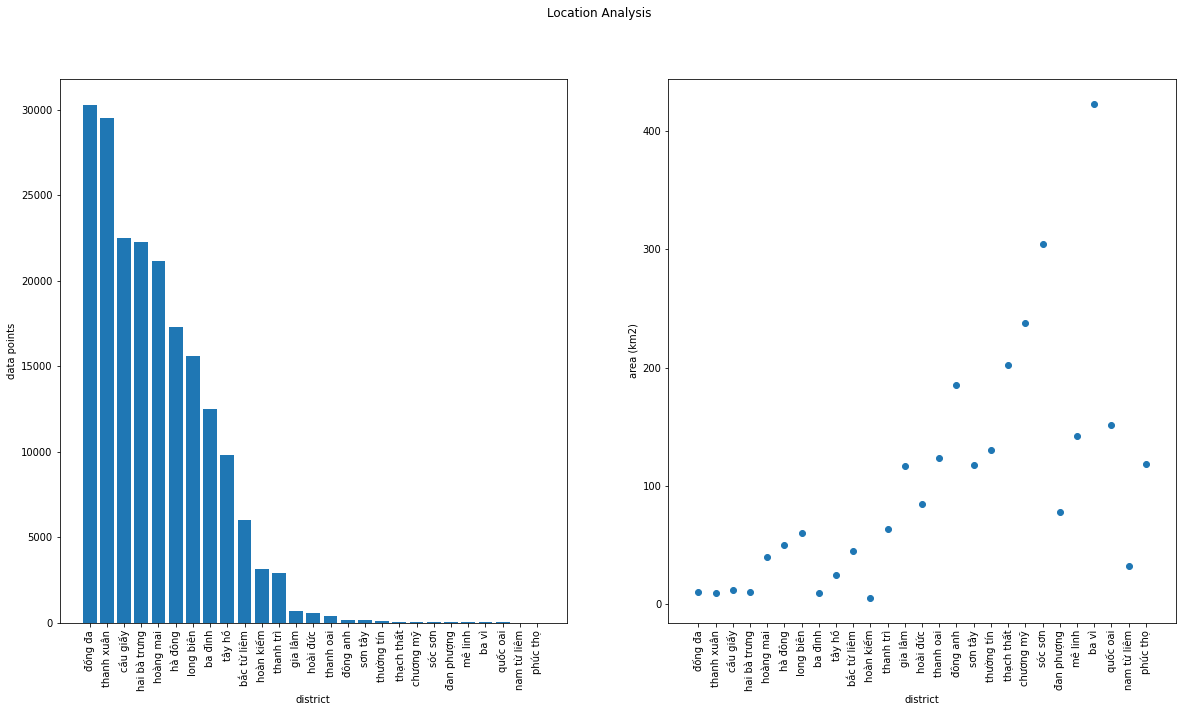

In [5]:
import matplotlib.pyplot as plt

uniques, counts = np.unique(locations, return_counts=True)

count_sort_ind = np.argsort(-counts)

uniques = uniques[count_sort_ind]
counts = counts[count_sort_ind]

district_areas = []
for u in uniques:
    for i, row in df2.iterrows():
        if row.district.lower() == u:
            district_areas.append(row.area)
            break

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
ax[0].bar(uniques, counts)
# ax.grid(True)
ax[0].set_ylabel('data points')
ax[0].set_xlabel('district')
ax[0].set_xticklabels(uniques, rotation='vertical')
# plt.xticks(uniques, rotation='vertical')


ax[1].scatter(uniques, district_areas)
ax[1].set_ylabel('area (km2)')
ax[1].set_xlabel('district')
ax[1].set_xticklabels(uniques, rotation='vertical')
# plt.xticks(rotation='vertical')

ax[1].set_xticks(uniques)
fig.suptitle('Location Analysis')
plt.show()

In [6]:
# Analysis

from scipy.stats import entropy

def cal_entropy(labels):
    uniques, counts = np.unique(labels, return_counts=True)
    return entropy(counts)

def cal_gini(labels):
    uniques, counts = np.unique(labels, return_counts=True)
    c = counts / len(labels)
    return 1 - np.sum(np.power(c, 2))

    
gini = cal_gini(locations)
e = cal_entropy(locations)

print('SUMMARY ABOUT LOCATIONS: ')
print('Mode: ', uniques[0])
print('Entropy: ', e)
print('Ln(k): ', np.log(len(np.unique(locations))))
print('Gini: ', gini)
print('1 - 1/K: ', 1 - 1/len(np.unique(locations)))

print('')

SUMMARY ABOUT LOCATIONS: 
Mode:  đống đa
Entropy:  2.3636480256399524
Ln(k):  3.295836866004329
Gini:  0.8926772114873034
1 - 1/K:  0.962962962962963

